<a href="https://colab.research.google.com/github/vaibhavlokunde/AI-ML/blob/main/Binary_classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import sklearn
from torch import nn
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import make_circles
n_samples=1000
X,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42)

In [7]:
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [8]:
#Test train split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2,
                                               random_state=42)

In [9]:
X.dtype

torch.float32

In [10]:
import torch
from torch import nn

# Make device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [41]:
def accuracy(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=correct/len(y_pred)
  return acc

In [35]:
len(X_train),len(y_train),len(X_test),len(y_test)

(800, 800, 200, 200)

In [38]:
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists,skipping download")
else:
  print("Downloading helper functions.py")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions,plot_decision_boundary

In [40]:
# This is the new model with non linear function

class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()


    self.layer_1=nn.Linear(in_features=2,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)

    #This is the non linear function
    self.relu=nn.ReLU()

  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_1=CircleModelV1().to(device)

model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [43]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(model_1.parameters(),lr=0.1)

In [46]:
#Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=1000

X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  y_logits=model_1(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  loss=loss_fn(y_logits,y_train)

  acc=accuracy(y_true=y_train,y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  #Testing Loop
  model_1.eval()
  with torch.inference_mode():
    test_logits=model_1(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy(y_true=y_test,y_pred=test_pred)

  if epoch % 100==0:
    print(f"Epoch:{epoch} | Loss:{loss:.4f}, Acc:{acc:.2f} | Test loss:{test_loss:.4f},Test acc:{test_acc:.2f}%")

Epoch:0 | Loss:0.6929, Acc:0.50 | Test loss:0.6931,Test acc:0.50%
Epoch:100 | Loss:0.6911, Acc:0.53 | Test loss:0.6910,Test acc:0.53%
Epoch:200 | Loss:0.6898, Acc:0.53 | Test loss:0.6894,Test acc:0.56%
Epoch:300 | Loss:0.6879, Acc:0.53 | Test loss:0.6872,Test acc:0.56%
Epoch:400 | Loss:0.6851, Acc:0.53 | Test loss:0.6841,Test acc:0.56%
Epoch:500 | Loss:0.6810, Acc:0.53 | Test loss:0.6794,Test acc:0.56%
Epoch:600 | Loss:0.6751, Acc:0.55 | Test loss:0.6728,Test acc:0.56%
Epoch:700 | Loss:0.6665, Acc:0.58 | Test loss:0.6631,Test acc:0.59%
Epoch:800 | Loss:0.6514, Acc:0.64 | Test loss:0.6474,Test acc:0.68%
Epoch:900 | Loss:0.6232, Acc:0.74 | Test loss:0.6211,Test acc:0.79%


In [49]:
model_1.eval()
with torch.inference_mode():
  y_preds=torch.round(torch.sigmoid(model_1(X_test))).squeeze()

y_preds[:10],y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

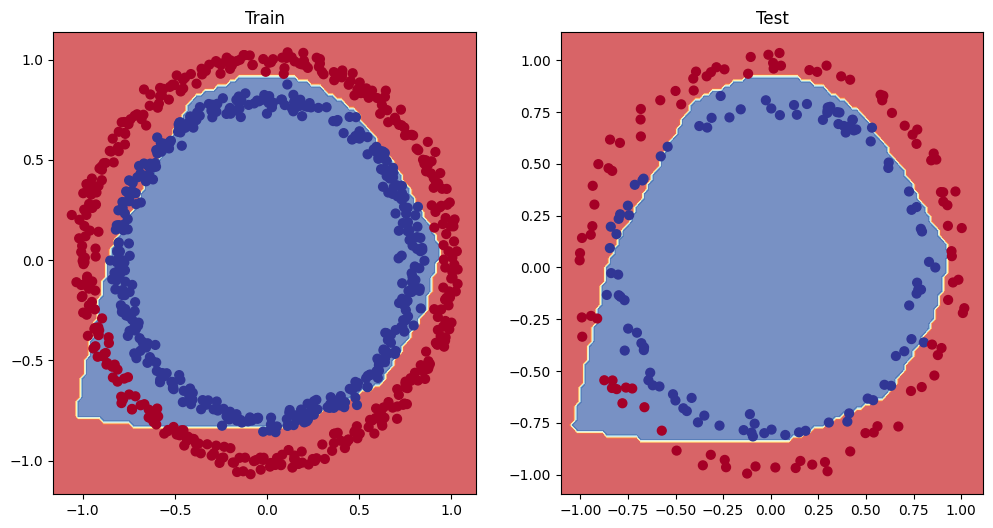

In [50]:
#Plot decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X_test,y_test)
